In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

%matplotlib inline

In [6]:
DataWsu = pd.read_csv(('C:\\Users\\XWANG221\\DataWsu.csv'), usecols=['Device','Trip','Time','LatitudeWsu','LongitudeWsu','GpsSpeedWsu','SpeedWsu'])

In [167]:
filters1 = (DataWsu.Device == 17103) & (DataWsu.Trip == 970)
CutIn1 = DataWsu[filters1]
print(CutIn1.head(10))

          Device  Trip  Time  LatitudeWsu  LongitudeWsu  GpsSpeedWsu  \
47204120   17103   970     0    42.281338    -83.735252     10.66525   
47204121   17103   970    10    42.281338    -83.735237     10.73368   
47204122   17103   970    20    42.281338    -83.735222     10.92425   
47204123   17103   970    30    42.281342    -83.735214     11.01027   
47204124   17103   970    40    42.281342    -83.735199     11.00031   
47204125   17103   970    50    42.281342    -83.735184     11.07490   
47204126   17103   970    60    42.281345    -83.735176     11.03833   
47204127   17103   970    70    42.281345    -83.735161     11.09345   
47204128   17103   970    80    42.281345    -83.735146     11.13803   
47204129   17103   970    90    42.281345    -83.735130     11.18768   

           SpeedWsu  
47204120  38.260792  
47204121  38.394901  
47204122  39.327301  
47204123  39.636990  
47204124  39.601101  
47204125  39.869640  
47204126  39.869640  
47204127  39.737999  
47204128 

In [168]:
filters2 = (DataWsu.Device == 10106) & (DataWsu.Trip == 248)
CutIn2 = DataWsu[filters2]

filters3 = (DataWsu.Device == 17103) & (DataWsu.Trip == 966)
CutIn3 = DataWsu[filters3]

filters4 = (DataWsu.Device == 17103) & (DataWsu.Trip == 967)
CutIn4 = DataWsu[filters4]

filters5 = (DataWsu.Device == 10106) & (DataWsu.Trip == 258)
CutIn5 = DataWsu[filters5]

filters6 = (DataWsu.Device == 10106) & (DataWsu.Trip == 266)
CutIn6 = DataWsu[filters6]

## The trajectories of 6 viehicles. The x-axis is the Latitude and y-axis is the Longitude.

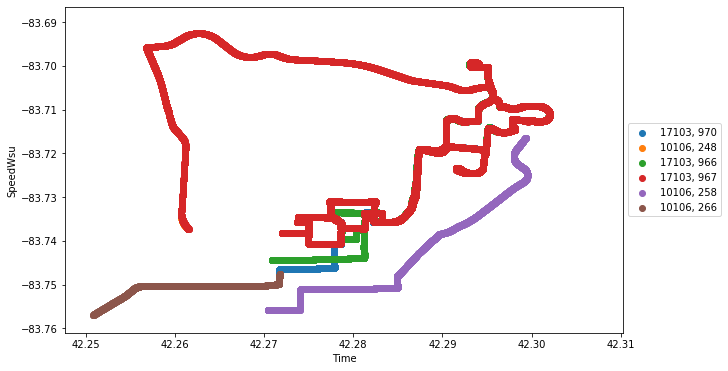

In [169]:
fig = plt.figure()
plt.scatter(CutIn1.LatitudeWsu, CutIn1.LongitudeWsu, label='17103, 970')
plt.scatter(CutIn2.LatitudeWsu, CutIn2.LongitudeWsu, label='10106, 248')
plt.scatter(CutIn3.LatitudeWsu, CutIn3.LongitudeWsu, label='17103, 966')
plt.scatter(CutIn4.LatitudeWsu, CutIn4.LongitudeWsu, label='17103, 967')
plt.scatter(CutIn5.LatitudeWsu, CutIn5.LongitudeWsu, label='10106, 258')
plt.scatter(CutIn6.LatitudeWsu, CutIn6.LongitudeWsu, label='10106, 266')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams["figure.figsize"] = (10,6)
# naming the x axis 
plt.xlabel('Latitude') 
# naming the y axis 
plt.ylabel('Longitude') 
plt.show()

In [260]:
freq = DataWsu.groupby(['Device', 'Trip']).size()
plt.rcParams["figure.figsize"] = (15,5)
freq

Device  Trip
501     57       30693
10106   247       4165
        248        441
        255        454
        256       4679
                 ...  
17103   969     118385
        970      95428
        971      26097
        1002    138898
        1003     32001
Length: 7593, dtype: int64

## The red line is the time when a Cut-in happens. The x-axis is the time and y-axis is the speed of the viehicle.

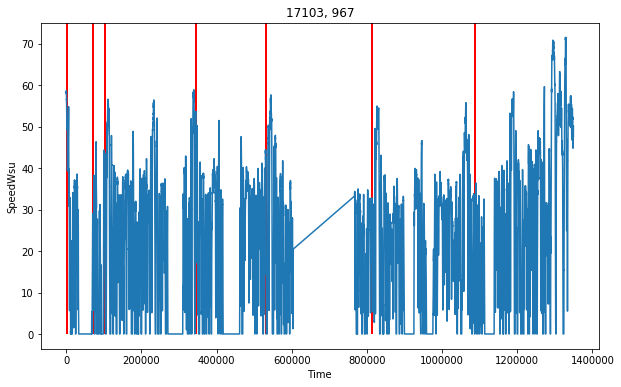

In [152]:
plt.plot(CutIn4.Time, CutIn4.SpeedWsu)
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('SpeedWsu') 
  
# giving a title to my graph 
plt.title('17103, 967') 
  
# function to show the plot 
# Takes list of lines, where each line is a sequence of coordinates
l1 = [(1950,0),(1950,80)]
l2= [(70650,0),(70650,80)]
l3= [(103830,0),(103830,80)]
l4= [(345770,0),(345770,80)]
l5= [(532320,0),(532320,80)]
l6= [(812830,0),(812830,80)]
l7 = [(1088470,0),(1088470,80)]
lc = LineCollection([l1, l2,l3,l4,l5,l6,l7],color=['red'], lw=2)

plt.gca().add_collection(lc)
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

In [173]:
greater = DataWsu.Time > 1000
lower = DataWsu.Time < 3000
filters = greater & lower
CutIn41 = CutIn4[filters]
CutIn21 = CutIn2[filters]
CutIn61 = CutIn6[filters]
CutIn11 = CutIn1[filters]

C:\Users\XWANG221\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\XWANG221\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\XWANG221\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\XWANG221\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


### Cut-in Time
1. 17103, 967: 1950
2. 10106, 248: 1290, 1690
3. 10106, 266: 2190
4. 17103, 970: 1969, 2330

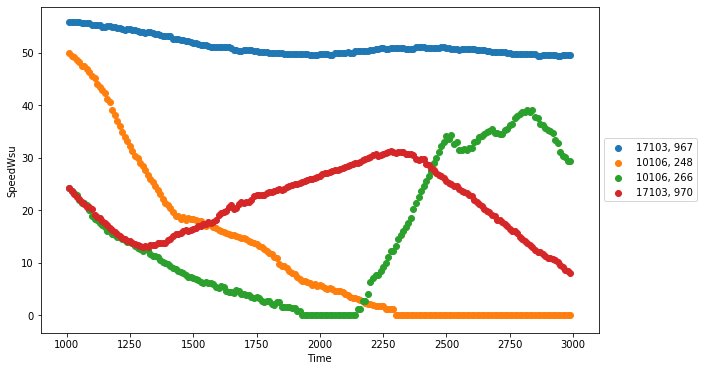

In [258]:
plt.scatter(CutIn41.Time, CutIn41.SpeedWsu, label='17103, 967')
plt.scatter(CutIn21.Time, CutIn21.SpeedWsu, label='10106, 248')
plt.scatter(CutIn61.Time, CutIn61.SpeedWsu, label='10106, 266')
plt.scatter(CutIn11.Time, CutIn11.SpeedWsu, label='17103, 970')
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('SpeedWsu') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

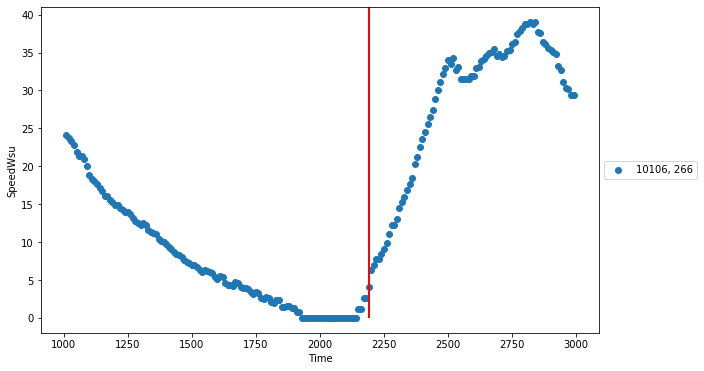

In [189]:
plt.scatter(CutIn61.Time, CutIn61.SpeedWsu, label='10106, 266')
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('SpeedWsu') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

l1 = [(2190,0),(2190,80)]

lc = LineCollection([l1],color=['r'], lw=2)

plt.gca().add_collection(lc)
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

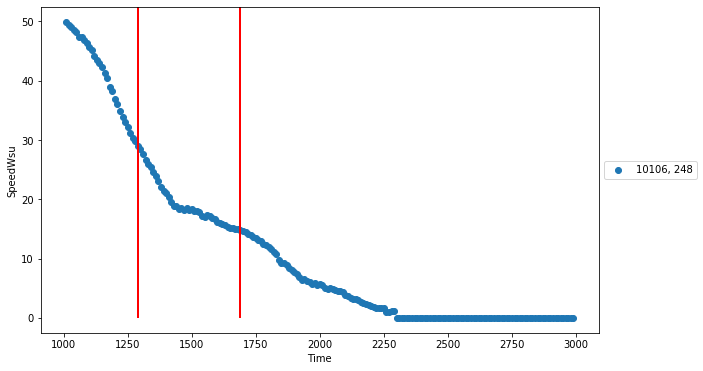

In [191]:
plt.scatter(CutIn21.Time, CutIn21.SpeedWsu, label='10106, 248')
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('SpeedWsu') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

l1 = [(1290,0),(1290,80)]
l2 = [(1690,0),(1690,80)]
lc = LineCollection([l1,l2],color=['r'], lw=2)

plt.gca().add_collection(lc)
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

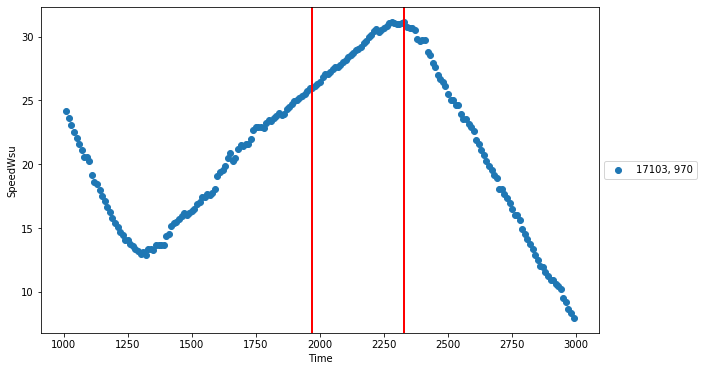

In [193]:
plt.scatter(CutIn11.Time, CutIn11.SpeedWsu, label='17103, 970')
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('SpeedWsu') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

l1 = [(1969,0),(1969,80)]
l2 = [(2330,0),(2330,80)]

lc = LineCollection([l1,l2],color=['r'], lw=2)

plt.gca().add_collection(lc)
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

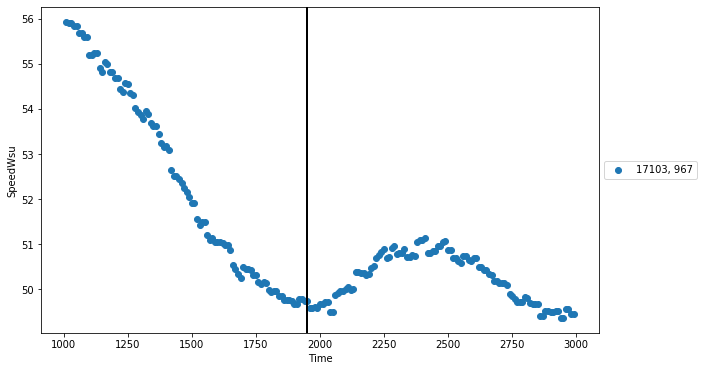

In [259]:
plt.scatter(CutIn41.Time, CutIn41.SpeedWsu, label='17103, 967')
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('SpeedWsu') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

l1 = [(1950,0),(1950,80)]

lc = LineCollection([l1],color=['black'], lw=2)

plt.gca().add_collection(lc)
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

## DataFrontTargets

In [198]:
DataFrontTargets = pd.read_csv(('C:\\Users\\XWANG221\\DataFrontTargets.csv'), usecols=['Device','Trip','Time','TargetId','ObstacleId','Range','Rangerate','Transversal','TargetType','CIPV'])

In [253]:
freq_front = DataFrontTargets.groupby(['Device', 'Trip']).size()
plt.rcParams["figure.figsize"] = (15,5)

In [254]:
freq_front

Device  Trip
10106   246         49
        247       6870
        248      11841
        251       1675
        255       2019
                 ...  
17103   966      76311
        967      26594
        969     109017
        970     105448
        971      33485
Length: 7206, dtype: int64

In [205]:
filters_front1 = (DataFrontTargets.Device == 10106) & (DataFrontTargets.Trip == 266)
front1 = DataFrontTargets[filters_front1]

In [224]:
greater_front = DataFrontTargets.Time > 1800
lower_front = DataFrontTargets.Time < 5000
#filters_front = greater_front & lower_front & (DataFrontTargets.ObstacleId == 42)
filters_front = greater_front & lower_front
front11 = front1[filters_front]

C:\Users\XWANG221\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


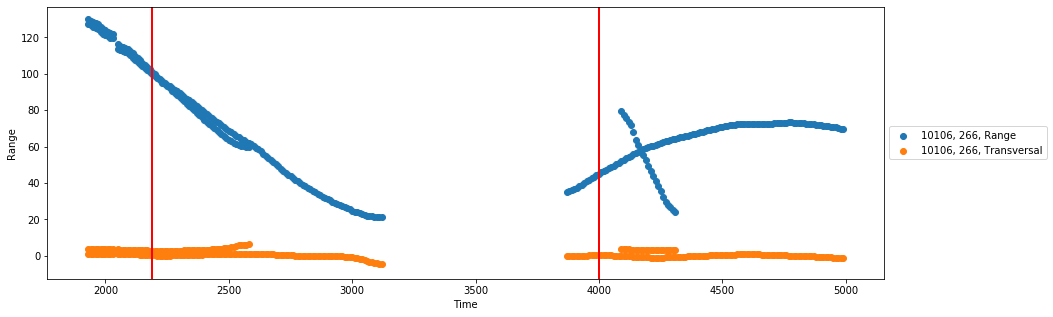

In [385]:
plt.scatter(front11.Time, front11.Range, label='10106, 266, Range')

plt.scatter(front11.Time, front11.Transversal, label='10106, 266, Transversal')
plt.xlabel('Time')  
plt.ylabel('Range') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

l1 = [(2190,-50),(2190,140)]
l2 = [(4000,-50),(4000,140)]

lc = LineCollection([l1,l2],color=['r'], lw=2)

plt.gca().add_collection(lc)
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

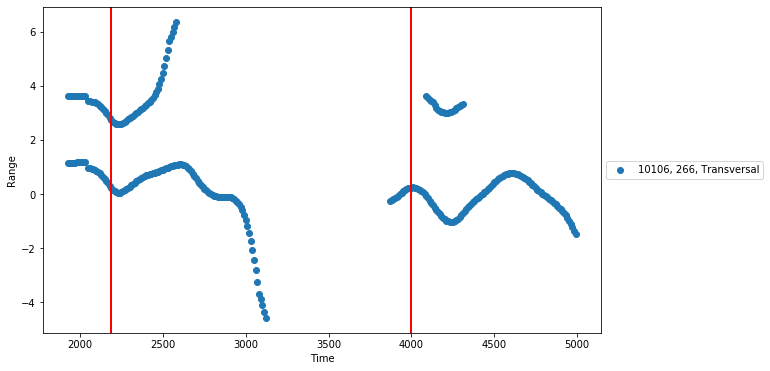

In [386]:
plt.scatter(front11.Time, front11.Transversal, label='10106, 266, Transversal')
plt.xlabel('Time') 
plt.ylabel('Range') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

l1 = [(2190,-50),(2190,140)]
l2 = [(4000,-50),(4000,140)]

lc = LineCollection([l1,l2],color=['r'], lw=2)

plt.gca().add_collection(lc)
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

## DataLane - lane chance

In [202]:
DataLane = pd.read_csv(('C:\\Users\\XWANG221\\DataLane.csv'), usecols=['Device','Trip','Time','LaneDistanceLeft','LaneDistanceRight','LaneHeading','LaneQualityRight','LaneQualityLeft'])

In [231]:
filters_lane1 = (DataLane.Device == 10106) & (DataLane.Trip == 251)
lane1 = DataLane[filters_lane1]

greater_lane = DataLane.Time > 3000
lower_lane = DataLane.Time < 5000
filters_lane = greater_lane & lower_lane
lane11 = lane1[filters_lane]

In [246]:
filters_lane2 = (DataLane.Device == 17103) & (DataLane.Trip == 12)
lane2 = DataLane[filters_lane2]
lane21 = lane2[filters_lane]

filters_lane3 = (DataLane.Device == 10141) & (DataLane.Trip == 410)
lane3 = DataLane[filters_lane3]
lane31 = lane3[filters_lane]

filters_lane4 = (DataLane.Device == 10142) & (DataLane.Trip == 216)
lane4 = DataLane[filters_lane4]
lane41 = lane4[filters_lane]

C:\Users\XWANG221\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\XWANG221\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\XWANG221\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


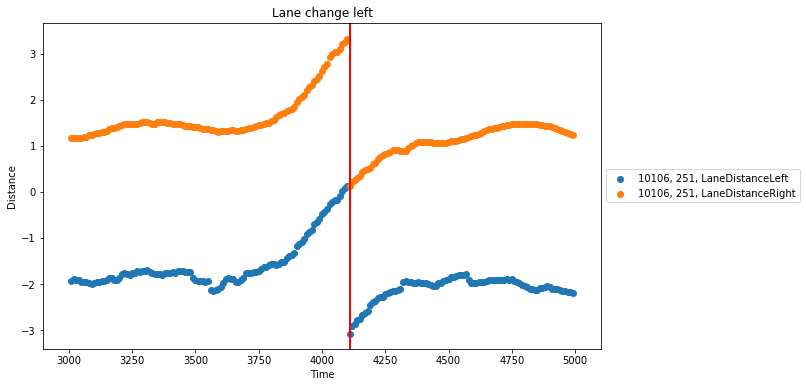

In [251]:
plt.scatter(lane11.Time, lane11.LaneDistanceLeft, label='10106, 251, LaneDistanceLeft')
plt.scatter(lane11.Time, lane11.LaneDistanceRight, label='10106, 251, LaneDistanceRight')
#plt.scatter(lane11.Time, lane11.LaneHeading, label='10106, 251, LaneHeading')
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('Distance') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# giving a title to my graph 
plt.title('Lane change left') 
  
l1 = [(4110,-50),(4110,140)]

lc = LineCollection([l1],color=['r'], lw=2)

plt.gca().add_collection(lc)
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

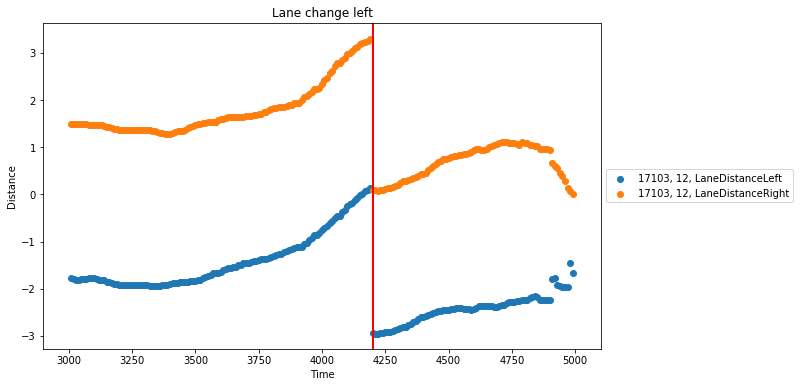

In [250]:
plt.scatter(lane21.Time, lane21.LaneDistanceLeft, label='17103, 12, LaneDistanceLeft')
plt.scatter(lane21.Time, lane21.LaneDistanceRight, label='17103, 12, LaneDistanceRight')
#plt.scatter(lane21.Time, lane11.LaneHeading, label='17103, 12, LaneHeading')
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('Distance') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# giving a title to my graph 
plt.title('Lane change left') 
  
l1 = [(4200,-50),(4200,140)]

lc = LineCollection([l1],color=['r'], lw=2)

plt.gca().add_collection(lc)
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

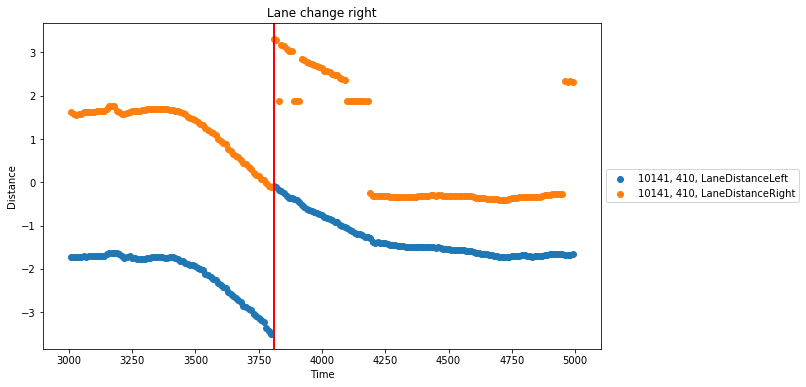

In [247]:
plt.scatter(lane31.Time, lane31.LaneDistanceLeft, label='10141, 410, LaneDistanceLeft')
plt.scatter(lane31.Time, lane31.LaneDistanceRight, label='10141, 410, LaneDistanceRight')
#plt.scatter(lane11.Time, lane11.LaneHeading, label='10106, 251, LaneHeading')
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('Distance') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# giving a title to my graph 
plt.title('Lane change right') 
l1 = [(3810,-50),(3810,140)]

lc = LineCollection([l1],color=['r'], lw=2)

plt.gca().add_collection(lc)
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

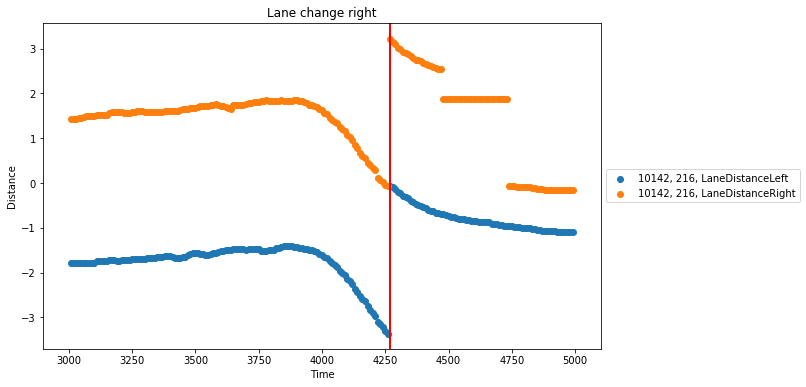

In [249]:
plt.scatter(lane41.Time, lane41.LaneDistanceLeft, label='10142, 216, LaneDistanceLeft')
plt.scatter(lane41.Time, lane41.LaneDistanceRight, label='10142, 216, LaneDistanceRight')
#plt.scatter(lane11.Time, lane11.LaneHeading, label='10106, 251, LaneHeading')
plt.xlabel('Time') 
# naming the y axis 
plt.ylabel('Distance') 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# giving a title to my graph 
plt.title('Lane change right') 
l1 = [(4270,-50),(4270,140)]

lc = LineCollection([l1],color=['r'], lw=2)

plt.gca().add_collection(lc)
plt.rcParams["figure.figsize"] = (10,6)
plt.show()